In [1]:
import pandas as pd 
import numpy as np 
import os 
import pathlib 
from tqdm import tqdm

maindir = "/Users/hieunguyen/data/WGS_features/20240929"
path_to_feature = os.path.join(maindir, "feature")
path_to_metadata = os.path.join(maindir, "metadata", "metadata.xlsx")

##### read feature end motif to check
if os.path.isfile("em.old.csv") == False:
    feat = "EM"
    maindf = pd.DataFrame(
        data = [f"{i}{j}{k}{l}"
                for i in ["A", "T", "G", "C"]
                for j in ["A", "T", "G", "C"]
                for k in ["A", "T", "G", "C"]
                for l in ["A", "T", "G", "C"]],
        columns = ["motif"]
    )
    all_files = [item for item in pathlib.Path(os.path.join(path_to_feature)).glob(f"*/*GWfeature_{feat}.csv")]
    for file in tqdm(all_files):
        sampleid = file.name.split("_")[0]
        tmpdf = pd.read_csv(file, index_col = [0])
        tmpdf.columns = ["motif", sampleid]
        maindf = maindf.merge(tmpdf, right_on = "motif", left_on = "motif")
        
    emdf = maindf[["motif", "1-ZLAAO90NB"]]
    emdf.to_csv("em.old.csv")
else:
    emdf = pd.read_csv("em.old.csv", index_col = [0])

##### read feature nucleosome to check
if os.path.isfile("nuc.old.csv") == False:
    feat = "Nucleosome"
    maindf = pd.DataFrame(
        data = range(-300, 301),
        columns = ["size"]
    )
    maindf["size"] = maindf["size"].astype(int)
    all_files = [item for item in pathlib.Path(os.path.join(path_to_feature)).glob(f"*/*GWfeature_{feat}.csv")]
    for file in tqdm(all_files):
        sampleid = file.name.split("_")[0]
        tmpdf = pd.read_csv(file, index_col = [0])
        tmpdf = tmpdf.T.reset_index()
        tmpdf.columns = ["size", sampleid]
        tmpdf["size"] = tmpdf["size"].astype(int)
        maindf = maindf.merge(tmpdf, right_on = "size", left_on = "size")
        
    nucdf = maindf[["size", "1-ZLAAO90NB"]]
    nucdf.to_csv("nuc.old.csv")
else:
    nucdf = pd.read_csv("nuc.old.csv", index_col = [0])

In [6]:
emdf_check = pd.read_csv("./output_debug/1-ZLAAO90NB_S7509-S7709.sorted.full_endmotif4bp.sorted.txt", sep="\t", header = None)[[1]]
emdf_check

,0,1
0,V350270271L3C003R07200727325_chr2_99999843::ch...,tctc
1,V350270271L3C003R03100813854_chr13_99999798::c...,CTTT
2,V350270271L4C005R02600353487_chr11_99999853::c...,ccac
3,V350270271L2C001R00701056349_chr12_99999867::c...,tgtt
4,V350270271L4C005R03601247629_chr12_99999881::c...,ccat
...,...,...
22603716,V350270271L4C006R03600413934_chrX_99999758::ch...,TAAG
22603717,V350270271L3C006R04100981243_chrX_99999810::ch...,CCTT
22603718,V350270271L3C002R04001285438_chr15_99999799::c...,ccct
22603719,V350270271L4C003R01401071957_chr2_99999828::ch...,cttt


In [2]:
dffinal = pd.read_csv("./output_debug/1-ZLAAO90NB_S7509-S7709.sorted.final_output.tsv", sep = "\t", header = None)

emdf_check1 = dffinal[(dffinal[5] >= 30) & (dffinal[3] > 0)][[8]]
emdf_check1.columns = ["motif"]
emdf_check2 = dffinal[(dffinal[5] >= 30) & (dffinal[3] < 0)][[9]]
emdf_check2.columns = ["motif"]
emdf_check = pd.concat([emdf_check1, emdf_check2], axis = 0)
emdf_check["motif"] = emdf_check["motif"].apply(lambda x: x.upper())
emdf_check = emdf_check[emdf_check["motif"].str.contains("N") == False]
emdf_check = emdf_check.reset_index().groupby("motif")["index"].count().reset_index()
emdf_check["index"] = emdf_check["index"].apply(lambda x: x/emdf_check["index"].sum())
checkdf = emdf.merge(emdf_check, right_on = "motif", left_on = "motif")
assert checkdf.shape[0] == 256

dfnuc_new = pd.read_csv("./output_debug/1-ZLAAO90NB_S7509-S7709.sorted.full_Nucleosome.dist.final.bed", sep = "\t", header = None)
dfnuc_new = dfnuc_new[(dfnuc_new[3] >= -300) & (dfnuc_new[3] <= 300)]
dfnuc_new = dfnuc_new.groupby(3)[0].count().reset_index()
dfnuc_new.columns = ["size", "check"]
dfnuc_new["check"] = dfnuc_new["check"].apply(lambda x: x/dfnuc_new["check"].sum())
checknucdf = nucdf.merge(dfnuc_new, right_on = "size", left_on = "size")

/var/folders/8j/g55jqp3s7mj16s_gvcwb4y800000gn/T/ipykernel_90508/571401460.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfnuc_new = pd.read_csv("./output_debug/1-ZLAAO90NB_S7509-S7709.sorted.full_Nucleosome.dist.final.bed", sep = "\t", header = None)


In [3]:
checkdf

,motif,1-ZLAAO90NB,index
0,AAAA,0.010443,0.010247
1,AAAT,0.006831,0.006775
2,AAAG,0.006253,0.006340
3,AAAC,0.004117,0.004093
4,AATA,0.003305,0.003279
...,...,...,...
251,CCGC,0.000586,0.000606
252,CCCA,0.024299,0.023715
253,CCCT,0.015741,0.015342
254,CCCG,0.002836,0.002933


<Axes: xlabel='size'>

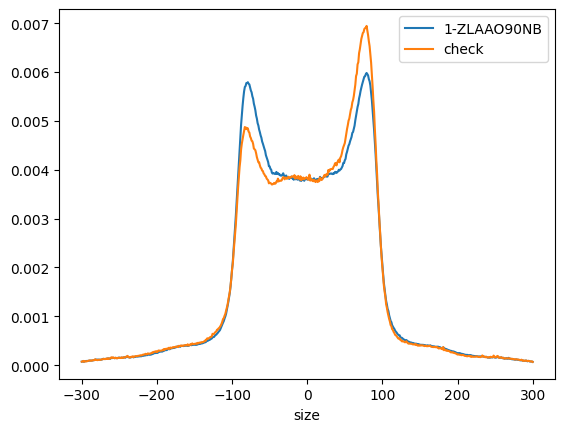

In [5]:
checknucdf.set_index("size").plot()